# Agenda: Visualization

1. Recap and Q&A
2. Visualization in general -- what, where, how, etc.
3. Different plot types
    - Line plots
    - Bar plots
    - Histograms
    - Pie plots
    - Scatter plots
    - Boxplots
4. What next?
    - Applying what you've learned
    - Analytics vs machine learning
5. Q&A    

# Recap 

The whole point of data analytics is to make sense of information we've gathered.  By using statistical techniques (including very simple calculations, such as mean, median, and std) we're able to understand the world, and our businesses better.  We can use that information to make better decisions going forward.

Pandas allows us to read in two-dimensional data (typically from a CSV file) into a data frame:

- Each row has an index (often numeric, but it doesn't have to be), and represents one sample, or one data point
- Each column in our data frame has a different dtype, has a column name, and represents one facet/aspect of our data

We've seen over the last few weeks that we can use a bunch of techniques to analyze this data:

- Select rows and columns matching particular criteria, and then analyze those subsets of our data
- Sort our data by index, or by values in our columns
- Join multiple data frames together, a la SQL, to combine information from different sources
- Group our data together, to get analysis per unique value in a category
- If we have text in a column, we can use the `.str` accessor to run various string-related methods
- If we have dates and times in a column, we can use the `.dt` accessor to run various date-related methods.
- We can even perform date arithmetic, retrieving "time delta" values, so that we can look at the amount of time that has been spent doing an activity.


# Plotting and visualization

Plotting has (at least) two purposes:

1. To make our data accessible to people who don't have the time or inclination to read through long sets of numbers and make sense of them.  As people, we register images very quickly, and understand their meanings very quickly.
2. You can get insights as to your data from the chart.  Humans are very good at identifying patterns, and we can often see a pattern in a chart, and then apply that insight back to our data.

# How do we plot?

In the Python world, the 900-pound gorilla of plotting is known as "Matplotlib." The good news is that Matplotlib can create any kind of plot you want, in any combination, with any colors, with any styles.

The bad news is that Matplotlib is HORRIBLY COMPLEX to learn. And to use. And to remember.

My preference (and what we'll do in this course) is to use a shell around Matplotlib, making it perhaps slightly less powerful, but much easier to use. The wrapper around Matplotlib that I like to use is ... Pandas!

If we plot things via Pandas, Pandas will translate our requests into Matplotlib's requirements, and will give us fully formed Matplotlib plots! 

There are some other wrappers around Matplotlib, and one of them is known as Seaborn, which is very impressive.

In [1]:
# in order for us to plot, we'll need load some things

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
s = Series(np.random.randint(0, 100, 10), 
          index=list('abcdefghij'))


In [3]:
s

a    22
b     7
c    79
d    42
e    84
f     3
g    44
h    38
i    35
j    10
dtype: int64

<AxesSubplot:>

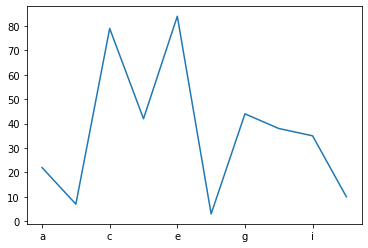

In [4]:
# I can turn this into a "line plot" with a simple command:

s.plot.line()

# Things to note

1. The plot appears inside of Jupyter. Earlier versions of Matplotlib (or Jupyter) required that you set something, or import something, for this to work.  Now it works out of the box.
2. The x axis reflects our index, and even shows every other value of the index.
3. The y axis reflects our values, and is automatically scaled to show from 0 through the top value we need.
4. The color, size, and other decorations are very plain -- we'll soon see how we can change these.

In [5]:
!head ../data/boston,ma.csv

date_time,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm","boston,ma_sunHour","boston,ma_uvIndex","boston,ma_uvIndex","boston,ma_moon_illumination","boston,ma_moonrise","boston,ma_moonset","boston,ma_sunrise","boston,ma_sunset","boston,ma_DewPointC","boston,ma_FeelsLikeC","boston,ma_HeatIndexC","boston,ma_WindChillC","boston,ma_WindGustKmph","boston,ma_cloudcover","boston,ma_humidity","boston,ma_precipMM","boston,ma_pressure","boston,ma_tempC","boston,ma_visibility","boston,ma_winddirDegree","boston,ma_windspeedKmph"
2018-12-11 00:00:00,1,-4,0.0,8.7,2,0,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-7,-3,0,-3,10,0,57,0.0,1022,-3,10,339,8
2018-12-11 03:00:00,1,-4,0.0,8.7,2,0,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-7,-1,1,-1,7,2,57,0.0,1023,-3,10,319,6
2018-12-11 06:00:00,1,-4,0.0,8.7,2,0,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-9,-5,-3,-5,8,4,60,0.0,1023,-4,10,334,7
2018-12-11 09:00:00,1,-4,0.0,8.7,2,2,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-9,1,1,1,3,6,49,0.0,1022,-1,10,334,

# Exercise: Plotting Boston winter

1. Read `boston,ma.csv` file into a data frame. We're only interested in three columns -- `boston,ma_mintempC`, `boston,ma_maxtempC` and `boston,ma_totalSnow_cm`.
2. Create a line plot for the min-temp column.

In the zipfile (https://files.lerner.co.il/pandas-workout-data.zip), you should find this file (among others).

In [8]:
df = pd.read_csv('boston,ma.csv',
                usecols=['boston,ma_maxtempC', 
                        'boston,ma_mintempC',
                        'boston,ma_totalSnow_cm'])
df.head()

,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm"
0,1,-4,0.0
1,1,-4,0.0
2,1,-4,0.0
3,1,-4,0.0
4,1,-4,0.0


In [9]:
df.shape

(728, 3)

In [10]:
df.dtypes

boston,ma_maxtempC          int64
boston,ma_mintempC          int64
boston,ma_totalSnow_cm    float64
dtype: object

<AxesSubplot:>

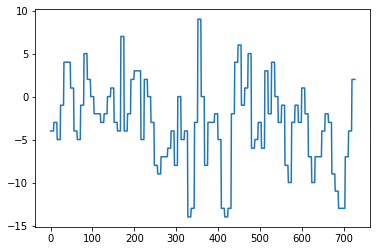

In [12]:
# let's create a line plot for min temp
df['boston,ma_mintempC'].plot.line()

In [13]:
df = pd.read_csv('boston,ma.csv',
                usecols=['date_time','boston,ma_maxtempC', 
                        'boston,ma_mintempC',
                        'boston,ma_totalSnow_cm'],
                parse_dates=['date_time'],
                index_col='date_time')
df.head()

,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm"
date_time,,,
2018-12-11 00:00:00,1,-4,0.0
2018-12-11 03:00:00,1,-4,0.0
2018-12-11 06:00:00,1,-4,0.0
2018-12-11 09:00:00,1,-4,0.0
2018-12-11 12:00:00,1,-4,0.0


<AxesSubplot:xlabel='date_time'>

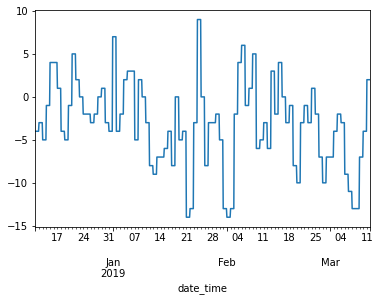

In [14]:
df['boston,ma_mintempC'].plot.line()

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

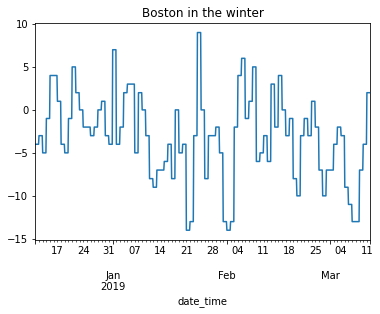

In [15]:
# let's make our plot even snazzier
# first: let's add a title

df['boston,ma_mintempC'].plot.line(title='Boston in the winter')

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

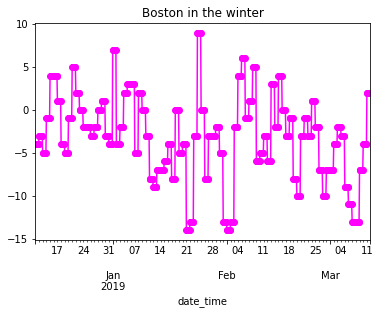

In [31]:
df['boston,ma_mintempC'].plot.line(title='Boston in the winter',
                                  color='#ff00ff',   # full red, 0 green, full blue == full purple
                                  style='-o')        # use lines (-), and mark data with circles (o)

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

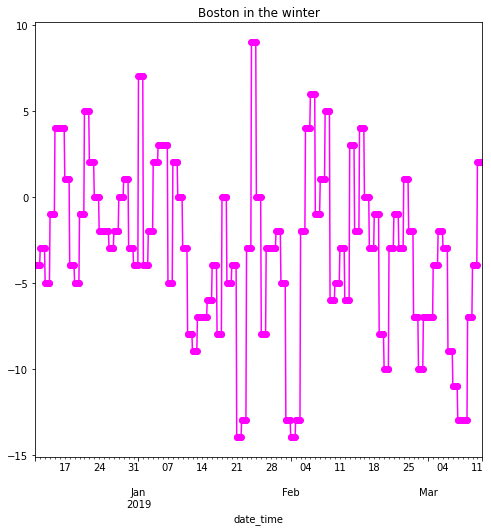

In [32]:
df['boston,ma_mintempC'].plot.line(title='Boston in the winter',
                                  color='#ff00ff',   # full red, 0 green, full blue == full purple
                                  style='-o',        # use lines (-), and mark data with circles (o)
                                figsize=(8,8))

In [33]:
# what if I want to plot more than one column?

# remember that nearly any method that can be invoked on a series can also be invoked on a data frame
# when we do this, we get a result for each of the columns in the data frame

In [34]:
df['boston,ma_mintempC'].mean()   # mean temperature on a single column

-3.142857142857143

In [35]:
df.mean()

boston,ma_maxtempC        2.868132
boston,ma_mintempC       -3.142857
boston,ma_totalSnow_cm    0.826374
dtype: float64

In [38]:
df.columns = ['max', 'min', 'snow']

<AxesSubplot:xlabel='date_time'>

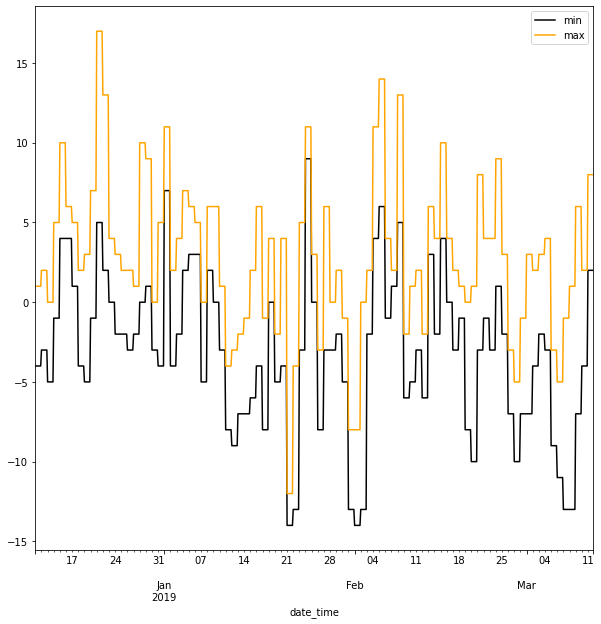

In [45]:
df[['min', 'max']].plot.line(figsize=(10,10),
                            color=['black', 'orange'])

array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>],
      dtype=object)

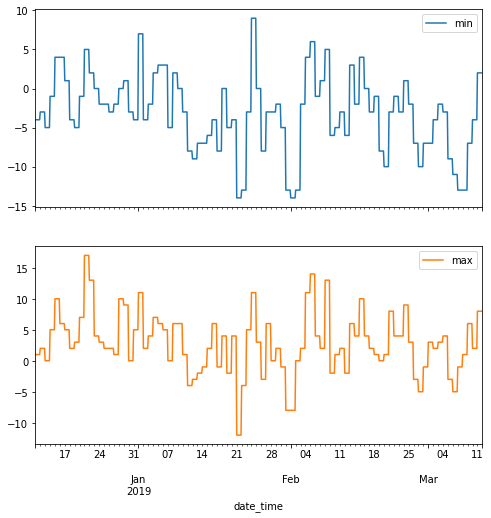

In [47]:
# sometimes, you want to plot columns alongside one another, but you don't want them
# in the same plot.

# for this, we have "subplots"

df[['min', 'max']].plot.line(subplots=True, figsize=(8,8))

# Exercise: More Boston winter plots

1. Plot min, max, and snow all on the same plot. Min should be in blue, max should be in red, and snow should be in gray.  Make sure that there is a title for the plot.
2. Replot these, but in several subplots.

<AxesSubplot:xlabel='date_time'>

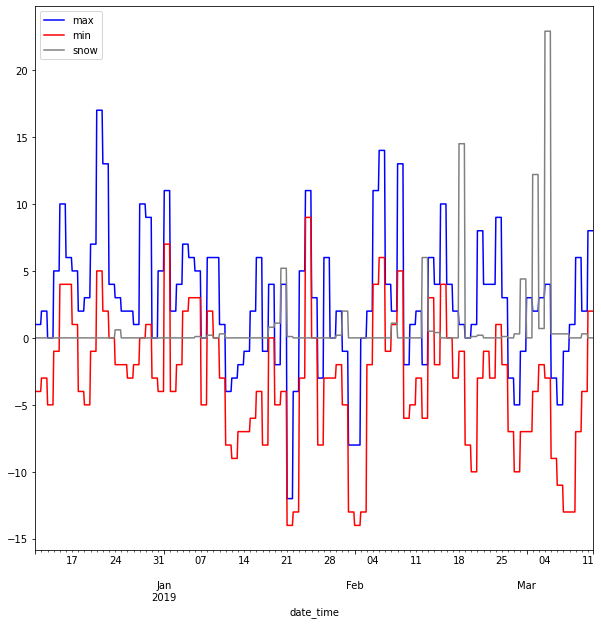

In [52]:
df[['max', 'min', 'snow']].plot.line(figsize=(10,10),
            color=['blue', 'red', 'gray'])

array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

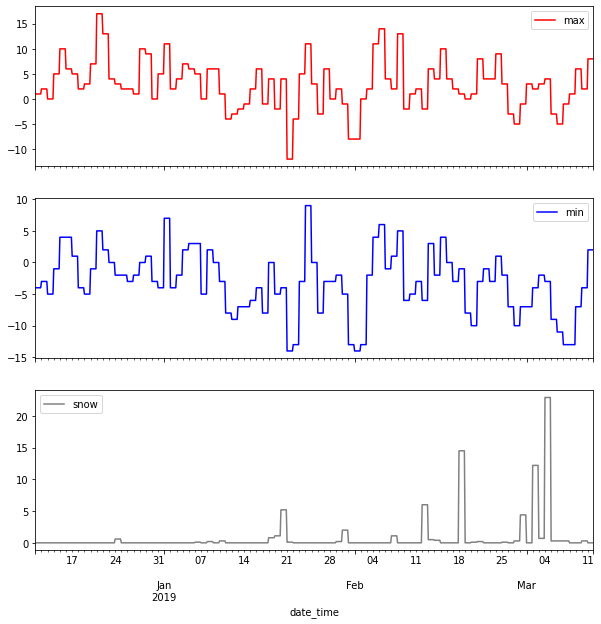

In [56]:
df[['max', 'min', 'snow']].plot.line(figsize=(10,10),
            color=['red', 'blue', 'gray'],
                                    subplots=True)

# Bar plots (bar charts)

When we create a line plot, we have the index along the x axis and the values along the y axis.  Matplotlib plots a point at the value for each index.  It then draws lines between each of those dots.

A bar plot does the same thing, in some ways: It plots the point for each index and each value. But instead of connecting those dots, it creates a vertical bar from the baseline all the way up to the value.

<AxesSubplot:xlabel='date_time'>

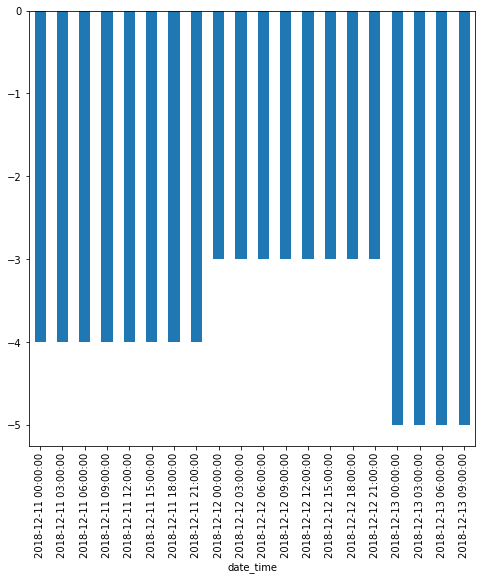

In [63]:
# I'm just going to plot the first 20 rows of this data frame

df.loc[:'2018-12-13 09:00:00', 'min'].plot.bar(figsize=(8,8))   # this creates a bar plot for our min column

<AxesSubplot:xlabel='date_time'>

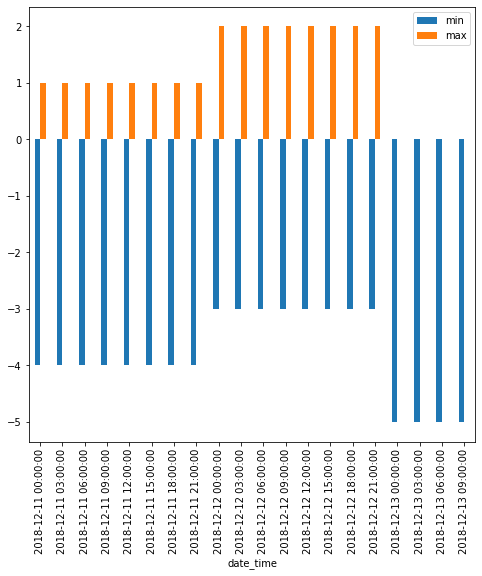

In [64]:
# If I want to plot both the min and the max, I can do that

df.loc[:'2018-12-13 09:00:00',  # row selector
       ['min', 'max']  # column selector
      
      ].plot.bar(figsize=(8,8))

# Next up

- More with bar plots
    - Stacking them
    - Horizontal bar plots
    - Limitations of line and bar plots
- Histograms    
- Pie plots
    - `value_counts` and pie plots
    
    

In [66]:
df = DataFrame([['apple', 1, 20],
                ['banana', 1.2, 15],
                ['cucumber', 0.5, 30],
                ['dill', 2, 10],
                ['endive', 5, 3]],
              columns=['product_name', 'price', 'sales']).set_index('product_name')
df

,price,sales
product_name,,
apple,1.0,20
banana,1.2,15
cucumber,0.5,30
dill,2.0,10
endive,5.0,3


<AxesSubplot:xlabel='product_name'>

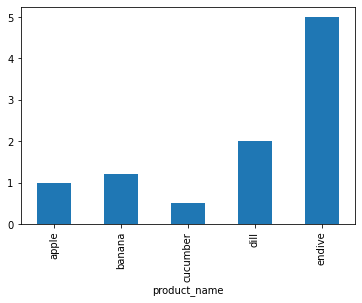

In [67]:
df['price'].plot.bar()

In [68]:
# what happens if there is 10% tax on each of our products?
# I can create a "tax" column, and then "total_price" column 

df['tax'] = df['price'] * 0.1
df

,price,sales,tax
product_name,,,
apple,1.0,20,0.10
banana,1.2,15,0.12
cucumber,0.5,30,0.05
dill,2.0,10,0.20
endive,5.0,3,0.50


In [69]:
df['total_price'] = df['price'] + df['tax']
df

,price,sales,tax,total_price
product_name,,,,
apple,1.0,20,0.10,1.10
banana,1.2,15,0.12,1.32
cucumber,0.5,30,0.05,0.55
dill,2.0,10,0.20,2.20
endive,5.0,3,0.50,5.50


<AxesSubplot:xlabel='product_name'>

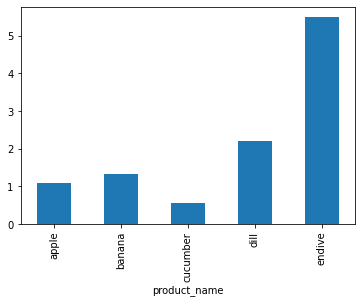

In [70]:
df['total_price'].plot.bar()

<AxesSubplot:xlabel='product_name'>

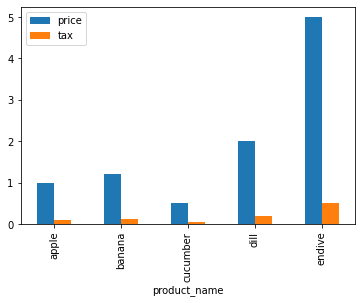

In [71]:
df[['price', 'tax']].plot.bar()

array([<AxesSubplot:title={'center':'price'}, xlabel='product_name'>,
       <AxesSubplot:title={'center':'tax'}, xlabel='product_name'>],
      dtype=object)

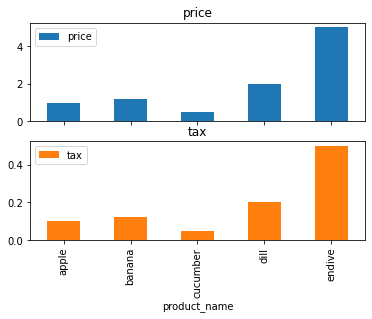

In [72]:
# what I really want to see is the total price, broken down into price and tax (separately)
# one thought: subplots

df[['price', 'tax']].plot.bar(subplots=True)

<AxesSubplot:xlabel='product_name'>

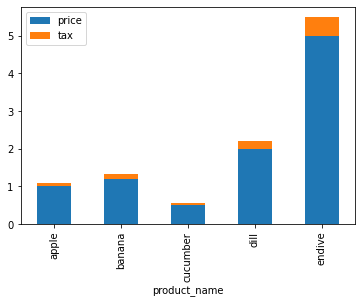

In [73]:
# I can instead ask for the bar plot to be "stacked"
# meaning: for every index, create *one* bar, combining all of the different columns

df[['price', 'tax']].plot.bar(stacked=True)

# Exercise: What makes up a taxi ride's price?

1. Load taxi data (ideally, from the big January 2019 NYC taxi file, but if that's too big, you can just use `taxi.csv`, which is far smaller).
2. When you load that data, you're going to want many more columns than before:
    - `fare_amount`
    - `extra`
    - `mta_tax`
    - `tip_amount`
    - `tolls_amount`
    - `improvement_surcharge`
    - `congestion_surcharge`
3. Create a stacked bar plot from the first 30 taxi rides in the system, showing how much of each total fare goes to each destination. 
4. Thought question: If someone says that the real problem with taxi rates is that the `mta_tax` is too high, what would you say?

In [75]:
df = pd.read_csv('../data/nyc_taxi_2019-01.csv',
                usecols=['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                         'improvement_surcharge', 'congestion_surcharge'])

In [76]:
df.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,7.0,0.5,0.5,1.65,0.0,0.3,NaN
1,14.0,0.5,0.5,1.00,0.0,0.3,NaN
2,4.5,0.5,0.5,0.00,0.0,0.3,NaN
3,3.5,0.5,0.5,0.00,0.0,0.3,NaN
4,52.0,0.0,0.5,0.00,0.0,0.3,NaN


<AxesSubplot:>

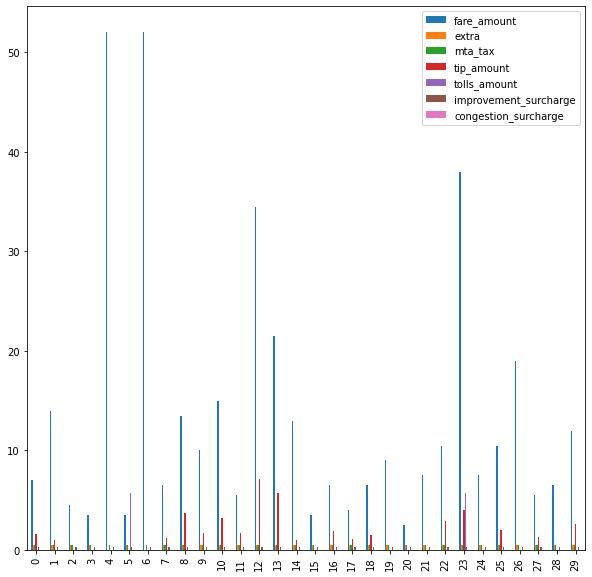

In [79]:
df[:30].plot.bar(figsize=(10,10))

<AxesSubplot:>

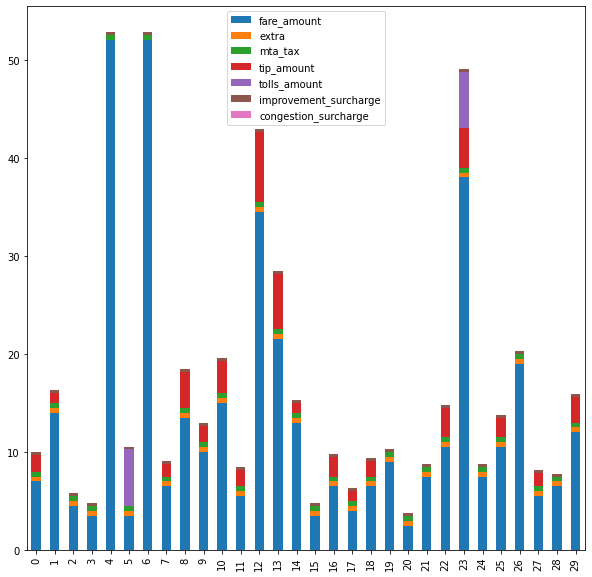

In [80]:
df[:30].plot.bar(figsize=(10,10),stacked=True)

<AxesSubplot:>

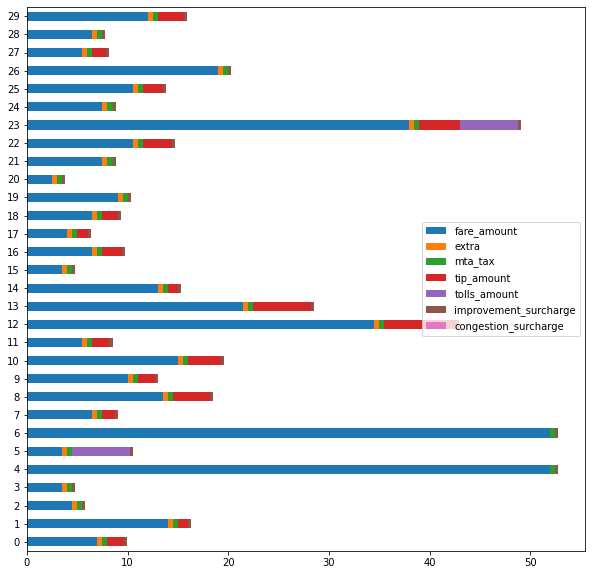

In [81]:
# Sometimes, I want a bar plot, but I want it to be horiontal, rather than vertical.
# to do that, I can call plot.barh rather than plot.bar

df[:30].plot.barh(figsize=(10,10),stacked=True)

In [82]:
df.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,7.0,0.5,0.5,1.65,0.0,0.3,NaN
1,14.0,0.5,0.5,1.00,0.0,0.3,NaN
2,4.5,0.5,0.5,0.00,0.0,0.3,NaN
3,3.5,0.5,0.5,0.00,0.0,0.3,NaN
4,52.0,0.0,0.5,0.00,0.0,0.3,NaN


# Histograms

A histogram is a great way to summarize the values in a data set. A histogram doesn't aim to provide us with perfect accuracy. Rather, it tells us how our data is distributed.

In a histogram, the program looks at the lowest and higest values, and divides the area between them into 10 "buckets" or "bins." It then goes through each value, assigning it to one of those bins.  It then shows how many items are in each bin.

In [83]:
s = Series(np.random.randint(0, 10, 100))
s

0     7
1     6
2     5
3     9
4     4
     ..
95    0
96    4
97    4
98    9
99    3
Length: 100, dtype: int64

<AxesSubplot:ylabel='Frequency'>

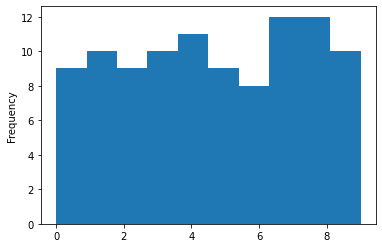

In [84]:
# I want to know how often each of these numbers appers in our series

s.plot.hist()

# Exercise: Histograms

1. Read in the taxi data, including the `tpep_pickup_datetime`, `passenger_count`, `tip_amount`, `total_amount`, and `trip_distance`.
2. Create a histogram showing how often each number of passengers travels in a taxi.
3. Create a histogram showing the distribution of tip percentages (i.e., `tip_amount` / `total_amount`).


In [96]:
df = pd.read_csv('../data/nyc_taxi_2019-01.csv',
                usecols=['tpep_pickup_datetime', 'passenger_count', 'tip_amount', 'total_amount', 'trip_distance'],
                parse_dates=['tpep_pickup_datetime'])

In [87]:
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,tip_amount,total_amount
0,2019-01-01 00:46:40,1,1.5,1.65,9.95
1,2019-01-01 00:59:47,1,2.6,1.00,16.30
2,2018-12-21 13:48:30,3,0.0,0.00,5.80
3,2018-11-28 15:52:25,5,0.0,0.00,7.55
4,2018-11-28 15:56:57,5,0.0,0.00,55.55


In [88]:
df.dtypes

tpep_pickup_datetime    datetime64[ns]
passenger_count                  int64
trip_distance                  float64
tip_amount                     float64
total_amount                   float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

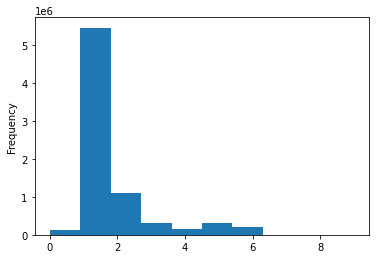

In [89]:
# histogram showing how often each number of passengers travels in a taxi
df['passenger_count'].plot.hist()

In [90]:
df.shape

(7667792, 5)

<AxesSubplot:ylabel='Frequency'>

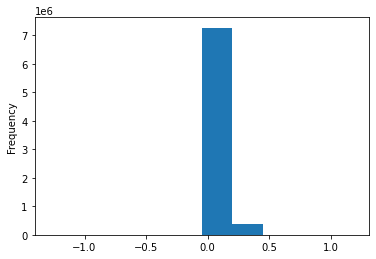

In [92]:
(df['tip_amount'] / df['total_amount']).plot.hist()

In [97]:
# remove all total_amounts <= and tip_amounts <0

df = df.loc[(df['tip_amount'] >= 0) & (df['total_amount'] > 0)]
df.shape

(7659247, 5)

<AxesSubplot:ylabel='Frequency'>

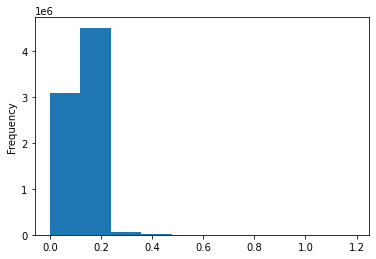

In [98]:
(df['tip_amount'] / df['total_amount']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

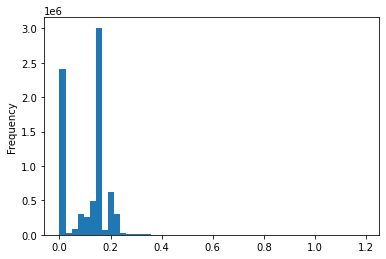

In [100]:
# I want to break this down even further
# I can control the number of bins in my histogram (not the default 10)

(df['tip_amount'] / df['total_amount']).plot.hist(bins=50)

In [101]:
# remove all total_amounts < and tip_amounts <0

df = df.loc[(df['tip_amount'] > 0) & (df['total_amount'] > 0)]
df.shape

(5257377, 5)

<AxesSubplot:ylabel='Frequency'>

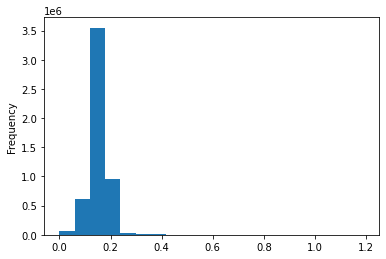

In [103]:
(df['tip_amount'] / df['total_amount']).plot.hist(bins=20)

In [104]:
df = DataFrame([['apple', 1, 20],
                ['banana', 1.2, 15],
                ['cucumber', 0.5, 30],
                ['dill', 2, 10],
                ['endive', 5, 3]],
              columns=['product_name', 'price', 'sales']).set_index('product_name')
df

,price,sales
product_name,,
apple,1.0,20
banana,1.2,15
cucumber,0.5,30
dill,2.0,10
endive,5.0,3


In [105]:
# I want to know how much of my income is coming from each product

df['income'] = df['price'] * df['sales']
df

,price,sales,income
product_name,,,
apple,1.0,20,20.0
banana,1.2,15,18.0
cucumber,0.5,30,15.0
dill,2.0,10,20.0
endive,5.0,3,15.0


In [107]:
# I want to know: Of the total income, how much comes from each product?

# option 1: sum the income column, and then show the proportion of income from each product

df['income'] / df['income'].sum()

product_name
apple       0.227273
banana      0.204545
cucumber    0.170455
dill        0.227273
endive      0.170455
Name: income, dtype: float64

<AxesSubplot:ylabel='income'>

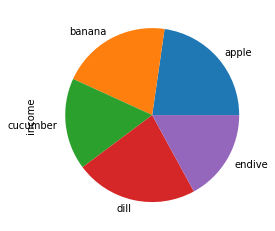

In [110]:
# option 2: I can use a pie plot, which graphically renders the same calculation we just did

df['income'].plot.pie()

<AxesSubplot:ylabel='price'>

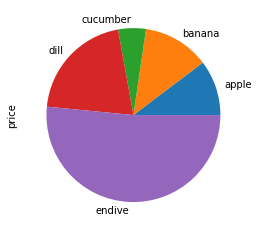

In [111]:
# a pie plot is only appropriate where you have a numeric column, and you want to
# see the proportion of that total provided by each row.

df['price'].plot.pie()  # does this make any sense? No!

In [112]:
# it's not uncommon to combine value_counts with a pie plot
# if you have a column that isn't summable, but you are interested in how often each particular
#  value appears, then you might want to use value_counts, get a series back, and then
#  get a pie plot for that series


# Exercise: Taxi pie plots

1. Read in the taxi data, including the `tpep_pickup_datetime`, `passenger_count`, `tip_amount`, `total_amount`, and `trip_distance`.
2. Create a pie plot, showing the distribution of `passenger_count`.
3. Add a new column to the data frame, for `cost_category`. It should contain one of three values: `low` for any trip under 5 dollars, `high` for any trip above 50 dollars, and `medium` for any others. Now produce a pie plot showing the distribution of high/medium/low cost trips.

In [113]:
df = pd.read_csv('../data/nyc_taxi_2019-01.csv',
                usecols=['tpep_pickup_datetime', 'passenger_count', 'tip_amount', 'total_amount', 'trip_distance'],
                parse_dates=['tpep_pickup_datetime'])

In [114]:
# don't do this!

# this would show: for each taxi ride, what proportion of that 12m passengers were in the car?
# df['passenger_count'].plot.pie()

12016030

In [115]:
df['passenger_count'].value_counts()

1    5456121
2    1114106
5     323842
3     314721
6     200811
4     140753
0     117381
8         29
7         19
9          9
Name: passenger_count, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

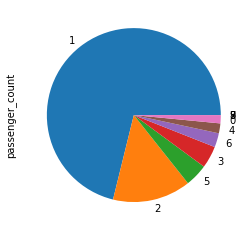

In [116]:
df['passenger_count'].value_counts().plot.pie()

In [117]:
df['passenger_count'].value_counts(normalize=True)

1    0.711564
2    0.145297
5    0.042234
3    0.041045
6    0.026189
4    0.018356
0    0.015308
8    0.000004
7    0.000002
9    0.000001
Name: passenger_count, dtype: float64

In [118]:
# 3. Add a new column to the data frame, for `cost_category`. 
# It should contain one of three values: `low` for any trip under 5 dollars, 
# `high` for any trip above 50 dollars, and `medium` for any others. 
# Now produce a pie plot showing the distribution of high/medium/low cost trips.

df['cost_category'] = 'medium'

In [119]:
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,tip_amount,total_amount,cost_category
0,2019-01-01 00:46:40,1,1.5,1.65,9.95,medium
1,2019-01-01 00:59:47,1,2.6,1.00,16.30,medium
2,2018-12-21 13:48:30,3,0.0,0.00,5.80,medium
3,2018-11-28 15:52:25,5,0.0,0.00,7.55,medium
4,2018-11-28 15:56:57,5,0.0,0.00,55.55,medium


In [123]:
df['cost_category'] = 'medium'
df.loc[df['total_amount'] < 5, 'cost_category'] = 'low'
df.loc[df['total_amount'] > 50, 'cost_category'] = 'high'

In [124]:
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,tip_amount,total_amount,cost_category
0,2019-01-01 00:46:40,1,1.5,1.65,9.95,medium
1,2019-01-01 00:59:47,1,2.6,1.00,16.30,medium
2,2018-12-21 13:48:30,3,0.0,0.00,5.80,medium
3,2018-11-28 15:52:25,5,0.0,0.00,7.55,medium
4,2018-11-28 15:56:57,5,0.0,0.00,55.55,high


<AxesSubplot:ylabel='cost_category'>

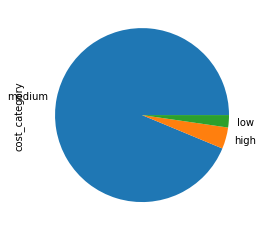

In [126]:
df['cost_category'].value_counts().plot.pie()

In [130]:
# another way to categorize a numeric column is with pd.cut

pd.cut(df['cost_category'],
     bins=[df['total_amount'].min(), 5, 50, df['total_amount'].max()],
       labels=['low', 'medium', 'high']
      )

TypeError: '<' not supported between instances of 'float' and 'str'

# Next up:

1. Histograms and pie plots + multiple columns
2. Scatter plots
3. What next?

